In [26]:
import pandas as pd 

df = pd.read_csv("data.csv", delimiter=';')

num_entries = df.shape[0]  
num_features = df.shape[1] 

print(f"{num_entries} entries with {num_features} features")

4424 entries with 37 features


In [27]:
df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [28]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [29]:
X = df.drop(columns=['Target'])

y = df['Target']

# Select import features

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)

top_n = 10  

selected_columns = important_features.index[:top_n]
X_new = X[selected_columns]

selected_columns


Index(['Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
       'Admission grade', 'Curricular units 2nd sem (evaluations)',
       'Tuition fees up to date', 'Age at enrollment',
       'Previous qualification (grade)',
       'Curricular units 1st sem (evaluations)'],
      dtype='object')

# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Target_encoded'] = label_encoder.fit_transform(df['Target'])

X = df.drop(columns=['Target', 'Target_encoded'])
y = df['Target_encoded']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.5]
n_estimators = [50, 100, 200]

gb_results = {}

for learning_rate in learning_rates:
    for n_est in n_estimators:
        gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=n_est, learning_rate=learning_rate, random_state=42)
        gbrt.fit(X_train, y_train)
        
        y_pred_train = gbrt.predict(X_train)
        y_pred_val = gbrt.predict(X_val)
        train_acc = accuracy_score(y_train, y_pred_train)
        val_acc = accuracy_score(y_val, y_pred_val)
    
        gb_results[(learning_rate, n_est)] = (train_acc, val_acc)


# XGBoost

In [33]:
import xgboost as xgb

xgb_results = {}

for learning_rate in learning_rates:
    for n_est in n_estimators:
        xgb_reg = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_est, max_depth=3, random_state=42)
        xgb_reg.fit(X_train, y_train)
        
        y_pred_train = xgb_reg.predict(X_train)
        y_pred_val = xgb_reg.predict(X_val)
        train_acc = accuracy_score(y_train, y_pred_train)
        val_acc = accuracy_score(y_val, y_pred_val)
        
        xgb_results[(learning_rate, n_est)] = (train_acc, val_acc)


# Early Termination

In [34]:
gbrt_early = GradientBoostingClassifier(max_depth=3, n_estimators=120, learning_rate=0.1, random_state=42, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
n_estimators_best = 0

for n_estimators in range(1, 121):
    gbrt_early.n_estimators = n_estimators
    gbrt_early.fit(X_train, y_train)
    y_pred_val = gbrt_early.predict(X_val)
    val_error = 1 - accuracy_score(y_val, y_pred_val)
    
    if val_error < min_val_error:
        min_val_error = val_error
        n_estimators_best = n_estimators
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  


Gradient Boosting:
Learning rate=0.01, n_estimators=50: Train Accuracy=0.7253, Validation Accuracy=0.7051
Learning rate=0.01, n_estimators=100: Train Accuracy=0.7539, Validation Accuracy=0.7367
Learning rate=0.01, n_estimators=200: Train Accuracy=0.7742, Validation Accuracy=0.7401
Learning rate=0.1, n_estimators=50: Train Accuracy=0.8081, Validation Accuracy=0.7559
Learning rate=0.1, n_estimators=100: Train Accuracy=0.8435, Validation Accuracy=0.7616
Learning rate=0.1, n_estimators=200: Train Accuracy=0.8864, Validation Accuracy=0.7695
Learning rate=0.5, n_estimators=50: Train Accuracy=0.9059, Validation Accuracy=0.7537
Learning rate=0.5, n_estimators=100: Train Accuracy=0.9607, Validation Accuracy=0.7582
Learning rate=0.5, n_estimators=200: Train Accuracy=0.9980, Validation Accuracy=0.7627

XGBoost:
Learning rate=0.01, n_estimators=50: Train Accuracy=0.7485, Validation Accuracy=0.7311
Learning rate=0.01, n_estimators=100: Train Accuracy=0.7578, Validation Accuracy=0.7299
Learning rate

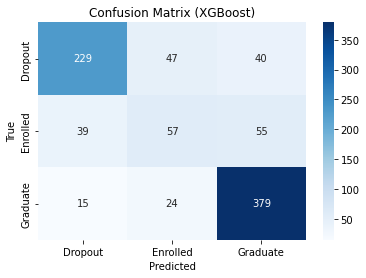

In [35]:
print("Gradient Boosting:")
for key, value in gb_results.items():
    learning_rate, n_est = key
    train_acc, val_acc = value
    print(f"Learning rate={learning_rate}, n_estimators={n_est}: Train Accuracy={train_acc:.4f}, Validation Accuracy={val_acc:.4f}")

print("\nXGBoost:")
for key, value in xgb_results.items():
    learning_rate, n_est = key
    train_acc, val_acc = value
    print(f"Learning rate={learning_rate}, n_estimators={n_est}: Train Accuracy={train_acc:.4f}, Validation Accuracy={val_acc:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_val, xgb_reg.predict(X_val))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

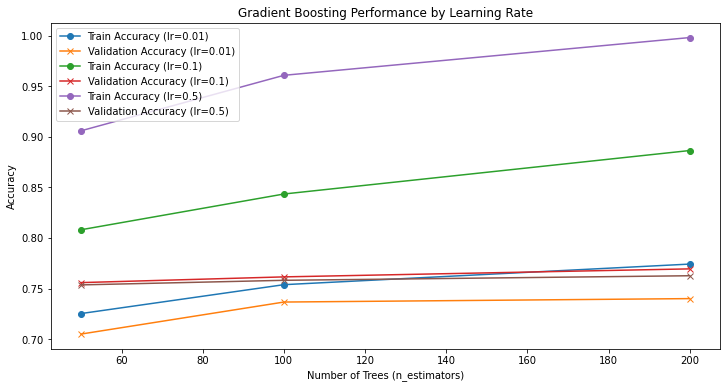

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for learning_rate in learning_rates:
    train_accs = []  
    val_accs = []    #
    for n_est in n_estimators:
        if (learning_rate, n_est) in gb_results:
            train_acc, val_acc = gb_results[(learning_rate, n_est)]
            train_accs.append(train_acc)  
            val_accs.append(val_acc)     
        else:
            print(f"Missing result for learning_rate={learning_rate}, n_estimators={n_est}")

    plt.plot(n_estimators, train_accs, label=f"Train Accuracy (lr={learning_rate})", marker='o')
    plt.plot(n_estimators, val_accs, label=f"Validation Accuracy (lr={learning_rate})", marker='x')

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Performance by Learning Rate")
plt.legend()
plt.show()


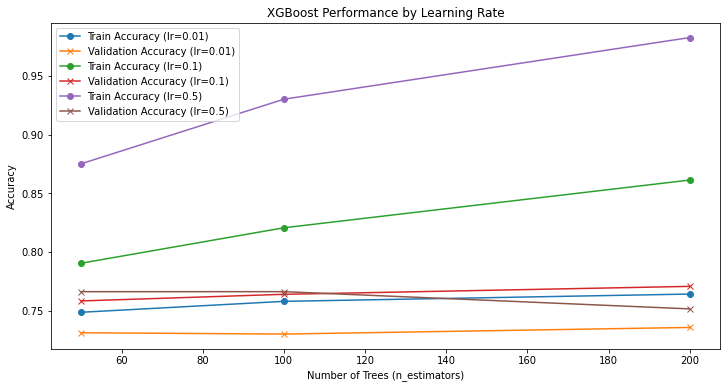

In [42]:
plt.figure(figsize=(12, 6))
for learning_rate in learning_rates:
    train_accs = []
    val_accs = []
    for n_est in n_estimators:
        train_acc, val_acc = xgb_results[(learning_rate, n_est)]
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    
    plt.plot(n_estimators, train_accs, label=f"Train Accuracy (lr={learning_rate})", marker='o')
    plt.plot(n_estimators, val_accs, label=f"Validation Accuracy (lr={learning_rate})", marker='x')

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("XGBoost Performance by Learning Rate")
plt.legend()
plt.show()


In [44]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

152 ms ± 35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

556 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
